In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('car_fuel_efficiency.csv')
df

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


In [3]:
df.dtypes

engine_displacement      int64
num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
fuel_efficiency_mpg    float64
dtype: object

In [4]:
for col in df.columns:
    print (col)
    print (df[col].unique()[:5])
    print (df[col].nunique())
    print


engine_displacement
[170 130 220 210 190]
36
num_cylinders
[ 3.  5. nan  4.  1.]
14
horsepower
[159.  97.  78.  nan 140.]
192
vehicle_weight
[3413.43375861 3149.66493422 3079.03899737 2542.39240183 3460.87098999]
9704
acceleration
[17.7 17.8 15.1 20.2 14.4]
162
model_year
[2003 2007 2018 2009 2008]
24
origin
['Europe' 'USA' 'Asia']
3
fuel_type
['Gasoline' 'Diesel']
2
drivetrain
['All-wheel drive' 'Front-wheel drive']
2
num_doors
[ 0.  2. -1.  1. nan]
9
fuel_efficiency_mpg
[13.23172891 13.68821744 14.246341   16.9127356  12.48836912]
9704


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

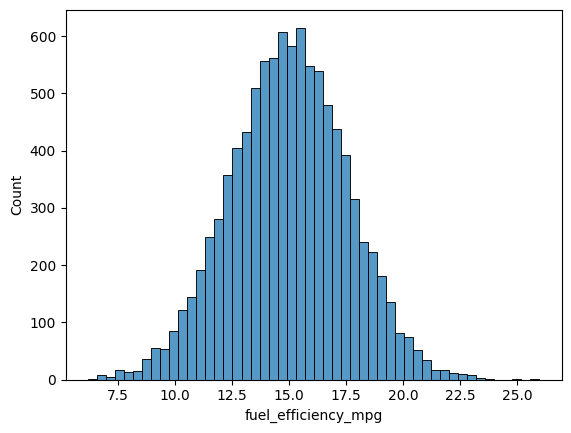

In [6]:
sns.histplot(df.fuel_efficiency_mpg,bins=50)

In [7]:
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [8]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
print (n)
print (n_val)
print (n_test)
print (n_train)

9704
1940
1940
5824


In [9]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [10]:
df['horsepower']
hp = np.array(df['horsepower'])
hp_median=np.nanpercentile(hp,50)
hp_median


np.float64(149.0)

In [11]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)


In [12]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [13]:
df_train.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
483,220,3.0,144.0,2535.887591,18.7,2009,USA,Gasoline,All-wheel drive,2.0,16.642943
7506,160,2.0,141.0,2741.170484,14.3,2019,Asia,Diesel,Front-wheel drive,2.0,16.298377
8795,230,3.0,155.0,2471.880237,NaN,2017,Asia,Diesel,Front-wheel drive,2.0,18.591822
1688,150,3.0,206.0,3748.164469,15.5,2015,USA,Gasoline,All-wheel drive,1.0,11.818843
6217,300,4.0,111.0,2135.716359,16.9,2006,USA,Gasoline,All-wheel drive,NaN,19.402209


In [14]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [15]:
y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

In [16]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [17]:
base = ['engine_displacement','horsepower','vehicle_weight','model_year']

In [19]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [37]:
base = ['engine_displacement','horsepower','vehicle_weight','model_year']

X_train = df_train[base].fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

y_pred

array([2.90981589, 2.84278709, 2.93310627, ..., 2.92329662, 3.00305539,
       2.94404905], shape=(5824,))

In [38]:
X_val = df_val[base].fillna(0).values
y_val_pred = w0 + X_val.dot(w)
y_val_pred

res = rmse(y_val, y_val_pred)
res= round(res,2)
res

np.float64(0.04)

<Axes: ylabel='Count'>

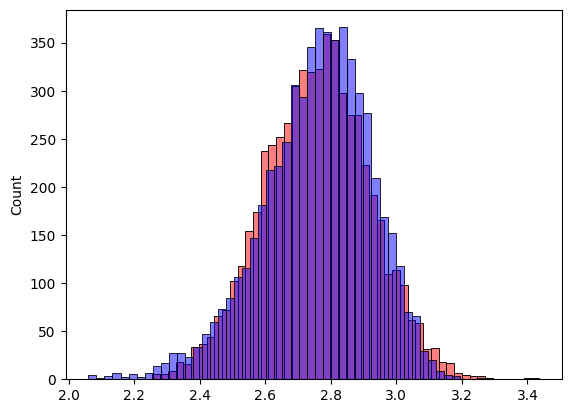

In [22]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [ ]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [24]:
rmse(y_train, y_pred)

np.float64(0.0390863253926525)

In [25]:
hp_train = np.array(df_train['horsepower'])
hp_median = np.nanmedian(hp_train)
hp_median

np.float64(149.0)

In [35]:
base = ['engine_displacement','horsepower','vehicle_weight','model_year']

X_train = df_train[base].fillna(149).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

y_pred

array([2.90496145, 2.83617617, 2.93283861, ..., 2.9215584 , 3.00289323,
       2.94290224], shape=(5824,))

In [27]:
rmse(y_train, y_pred)

np.float64(0.03581253276160714)

In [36]:
X_val = df_val[base].fillna(149).values
y_val_pred = w0 + X_val.dot(w)
y_val_pred

res= rmse(y_val, y_val_pred)
res= round(res,2)
res

np.float64(0.04)

In [67]:
def prepare_X(df):
    df = df.copy()
    base = ['engine_displacement','horsepower','vehicle_weight','model_year']
    
    df['age'] = 2023 - df['model_year']
    features = base + ['age']

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [48]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [49]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    score= round(score,2)
    
    print(r, w0, score)

0 13.502615280661587 2.82
0.01 1.7984767154679676e-06 0.04
0.1 1.7990802958298238e-06 0.04
1 1.7990333020550387e-06 0.04
5 1.7990281279503353e-06 0.04
10 1.7990101737314602e-06 0.04
100 1.7987053786575555e-06 0.04


In [95]:
df = pd.read_csv('car_fuel_efficiency.csv')

In [97]:
rmse_score = []

n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
print (n)
print (n_val)
print (n_test)
print (n_train)

for seed_value in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:

    df= df.copy()
    idx = np.arange(n)
    np.random.seed(seed_value)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    #print( df_train.describe())

    #print (df_train.head())
    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values
    
    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']
    
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train,r=0.001)
    print(w0)
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_pred, y_val)
    #score= round(score,2)
    print( seed_value, w0, score)
    rmse_score.append(score)

std_dev= round(np.std(rmse_score),3)
print (std_dev)

9704
1940
1940
5824
1.389205178512992e-05
0 1.389205178512992e-05 0.5206531295053825
1.4280228766807673e-05
1 1.4280228766807673e-05 0.5213388912692015
1.357678254671915e-05
2 1.357678254671915e-05 0.5228069982627849
1.4063042310133584e-05
3 1.4063042310133584e-05 0.5159516738499738
1.3501198017468398e-05
4 1.3501198017468398e-05 0.5109129459756332
1.3494949254978827e-05
5 1.3494949254978827e-05 0.528340644932979
1.3553979884526815e-05
6 1.3553979884526815e-05 0.5313910655976997
1.4182319361802619e-05
7 1.4182319361802619e-05 0.5090670390733505
1.3705020480290513e-05
8 1.3705020480290513e-05 0.5147399131970376
1.3903479773058666e-05
9 1.3903479773058666e-05 0.5131865910838243
0.007


In [80]:
df = pd.read_csv('car_fuel_efficiency.csv')
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
print (n)
print (n_val)
print (n_test)
print (n_train)

idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]
#print (df_train.head())
y_train = (df_train.fuel_efficiency_mpg.values)
y_val = (df_val.fuel_efficiency_mpg.values)
y_test = (df_test.fuel_efficiency_mpg.values)
    
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']
df_full_train = pd.concat([df_train, df_val])   
df_full_train = df_full_train.reset_index(drop=True)
y_full_train = np.concatenate([y_train, y_val])
r=0.001
X_full_train = prepare_X(df_full_train)
w0, w = train_linear_regression_reg(X_full_train, y_full_train,r=r)

X_val = prepare_X(df_test)
y_pred = w0 + X_val.dot(w)
score = rmse(y_pred, y_test)
    #score= round(score,2)
print(r, w0, score)

9704
1940
1940
5824
0.001 1.3813509895082604e-05 0.5156132023318954
